# Assignment 3

## Problem 1

The goal of this exercise is to compare clustering coefficient and the length of shorthest path of Watts-Strogatz model with Erdos-Renyi model. To do so, we will create multiple instances of Watts-Strogatz model with $N=100$ vertices and different values for $k$. Similarly, we will generate multiple instances of ER model with $N=100$ and $m = \frac{k\cdot N}{2}$.



Firstly, we will import the necessary packages.

In [1]:
import sys, os
sys.path.insert(0, '../src/')
import algorithms.watts_strogatz as ws
import algorithms.erdos_renyi as er
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, beta = 100, 0.5
K = np.arange(30, 90, 2)
er_graphs = []
ws_graphs = []
for k in K:
    m = k*N // 2
    ws_graphs.append(er.er_nm(N, m))
    er_graphs.append(ws.watts_strogatz(N, k, beta, seed=1234))

Now we will make two different plots. In one, we will compare the diameters of the above generated graphs and in the second one, we will compare clustering coefficient.

In [3]:
# on x axis, plot k
# on y axis, plot the diameter
ws_diam, er_diam, ws_cc, er_cc = [], [], [], []

for g1, g2 in zip(ws_graphs, er_graphs):
    ws_cc.append(g1.global_clustering_coefficient())
    paths = g1.shortest_path()
    max_path = [[(0 if np.isinf(paths[u][v]) else paths[u][v]) for v in g1.vertices()] for u in g1.vertices()]
    ws_diam.append(max(max(max_path)))
    er_diam.append(g2.diameter())
    er_cc.append(g2.global_clustering_coefficient())


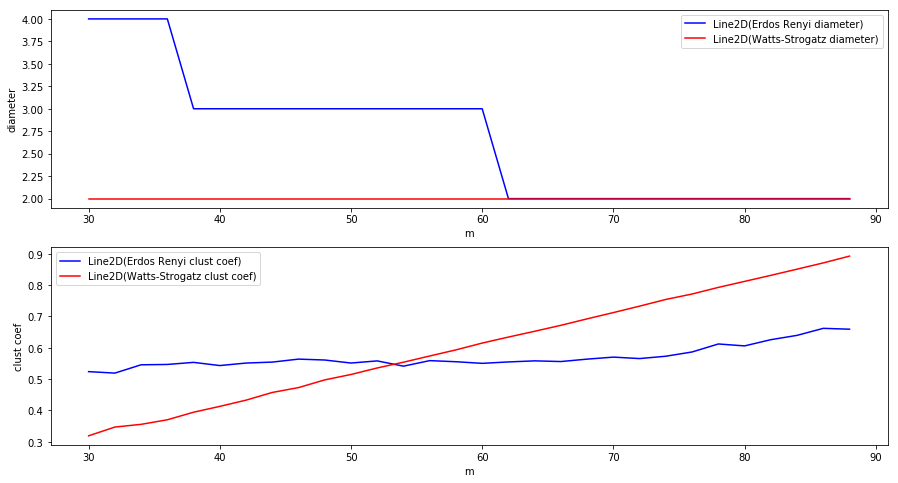

In [4]:
fig = plt.figure(figsize = (15, 8))
plt.subplot(211)
er_line, = plt.plot(K, er_diam, 'b', label="Erdos Renyi diameter")
ws_line, = plt.plot(K, ws_diam, 'r', label="Watts-Strogatz diameter")
plt.legend([er_line, ws_line])
plt.xlabel("m")
plt.ylabel("diameter")


plt.subplot(212)
cc_er_line, = plt.plot(K, er_cc, 'b', label="Erdos Renyi clust coef")
cc_ws_line, = plt.plot(K, ws_cc, 'r', label="Watts-Strogatz clust coef")
plt.legend([cc_er_line, cc_ws_line])
plt.xlabel("m")
plt.ylabel("clust coef")

plt.show()

As we can see from the above plots, graphs following BA model have approximately the same diameter as ER graphs while the clustering coefficient is increased.

## Problem 2

The goal of this exercise is to show that Barabasi-Albert model produces a scale free network.
To do that, we will generate a random graph following BA model and compute the degree distribution. Then, we will try to approximate the obtained distribution with power law distribution.

In [5]:
import algorithms.barabasi_albert as ba
reload(ba)
N, m, gamma = 1000, 100, -2
M = np.arange(90, 150)

g = ba.barabasi_albert(N, m)

# ba_graphs = [ba.barabasi_albert(N, m) for m in M]

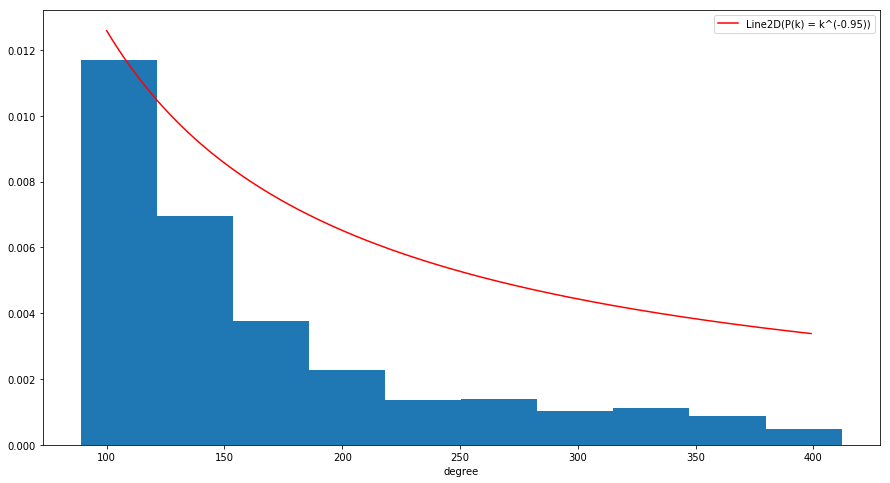

In [6]:
gamma = -0.95
fig = plt.figure(figsize=(15, 8))
degree_seq = np.array(g.degree_sequence(), dtype=np.float32)
degree_dist = degree_seq / sum(degree_seq)
plt.hist(degree_seq, normed=True)
degree_range = np.arange(100, 400, dtype=np.float32)
p_law = [k**gamma for k in degree_range]
pl_line, = plt.plot(degree_range, p_law, 'r-', label="P(k) = k^(-0.95)")
plt.legend([pl_line])
plt.xlabel("degree")

plt.show()